In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Carga de datos
df_train = pd.read_csv("../data/train/train.csv")
df_test = pd.read_csv("../data/processed/df_test_proce.csv")

# Separación de características y target
X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Preparación de los datos de test
X_test_scaled = scaler.transform(df_test)


Modelo 1 - Random Forest (Regularización + Cross-Validation)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modelo Random Forest con cross-validation
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5)
rf.fit(X_train, y_train)
rf

RandomForestClassifier(max_depth=10, random_state=42)

In [22]:
y_pred_rf = rf.predict(X_val)
y_test_pred_rf = rf.predict(X_test_scaled)

# Evaluación
print("Random Forest Classifier:")
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score:", cv_scores_rf.mean())
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_rf))
print("Classification Report:\n", classification_report(y_val, y_pred_rf))


Random Forest Classifier:
Cross-Validation Scores: [0.853125 0.878125 0.86875  0.8375   0.85    ]
Mean CV Score: 0.8574999999999999
Accuracy on Validation: 0.8925
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.90      0.87      0.88        91
           2       0.80      0.85      0.83        92
           3       0.92      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



Modelo 2 - Support Vector Classifier (SVC) (Regularización + Cross-Validation)

In [23]:
from sklearn.svm import SVC

# Modelo SVC con regularización y cross-validation
svc = SVC(C=1.0, kernel='rbf', random_state=42)
cv_scores_svc = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train, y_train)
svc


SVC(random_state=42)

In [24]:
y_pred_svc = svc.predict(X_val)
y_test_pred_svc = svc.predict(X_test_scaled)

# Evaluación
print("Support Vector Classifier:")
print("Cross-Validation Scores:", cv_scores_svc)
print("Mean CV Score:", cv_scores_svc.mean())
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_svc))
print("Classification Report:\n", classification_report(y_val, y_pred_svc))

Support Vector Classifier:
Cross-Validation Scores: [0.853125 0.89375  0.878125 0.846875 0.85    ]
Mean CV Score: 0.8643749999999999
Accuracy on Validation: 0.8925
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.80      0.89      0.84        91
           2       0.84      0.82      0.83        92
           3       0.96      0.92      0.94       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



Modelo 3 - Gradient Boosting (Regularización + Cross-Validation)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Modelo Gradient Boosting con early stopping
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=5)
gb.fit(X_train, y_train)
gb

GradientBoostingClassifier(max_depth=5, random_state=42)

In [26]:
y_pred_gb = gb.predict(X_val)
y_test_pred_gb = gb.predict(X_test_scaled)

# Evaluación
print("Gradient Boosting Classifier:")
print("Cross-Validation Scores:", cv_scores_gb)
print("Mean CV Score:", cv_scores_gb.mean())
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_gb))
print("Classification Report:\n", classification_report(y_val, y_pred_gb))


Gradient Boosting Classifier:
Cross-Validation Scores: [0.89375  0.9      0.896875 0.884375 0.903125]
Mean CV Score: 0.8956250000000001
Accuracy on Validation: 0.9175
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       105
           1       0.89      0.95      0.91        91
           2       0.86      0.87      0.86        92
           3       0.94      0.90      0.92       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Modelo 4 - Logistic Regression (Regularización L2)

In [27]:
from sklearn.linear_model import LogisticRegression

# Modelo Logistic Regression con regularización L2
lr = LogisticRegression(C=1.0, solver='liblinear', random_state=42)
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5)
lr.fit(X_train, y_train)
lr


LogisticRegression(random_state=42, solver='liblinear')

In [28]:
y_pred_lr = lr.predict(X_val)
y_test_pred_lr = lr.predict(X_test_scaled)

# Evaluación
print("Logistic Regression:")
print("Cross-Validation Scores:", cv_scores_lr)
print("Mean CV Score:", cv_scores_lr.mean())
print("Accuracy on Validation:", accuracy_score(y_val, y_pred_lr))
print("Classification Report:\n", classification_report(y_val, y_pred_lr))

Logistic Regression:
Cross-Validation Scores: [0.8375   0.83125  0.825    0.80625  0.803125]
Mean CV Score: 0.820625
Accuracy on Validation: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       105
           1       0.79      0.63      0.70        91
           2       0.75      0.72      0.73        92
           3       0.91      1.00      0.95       112

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.85      0.84       400



K-Means Clustering (Modelo No Supervisado)

In [17]:
from sklearn.cluster import KMeans

# Modelo KMeans con n_init especificado
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_val)
clusters_test = kmeans.predict(X_test_scaled)

# Evaluación
print("KMeans Clustering (Validation Data):")
print(pd.crosstab(y_val, clusters))

print("KMeans Clustering (Test Data):")
print(pd.crosstab(clusters_test, clusters_test))


KMeans Clustering (Validation Data):
col_0         0   1   2   3
price_range                
0            19  25  23  38
1            21  22  16  32
2            16  21  28  27
3            33  27  30  22
KMeans Clustering (Test Data):
col_0    0    1    2    3
row_0                    
0      200    0    0    0
1        0  239    0    0
2        0    0  235    0
3        0    0    0  326


Interpretación de Variables 

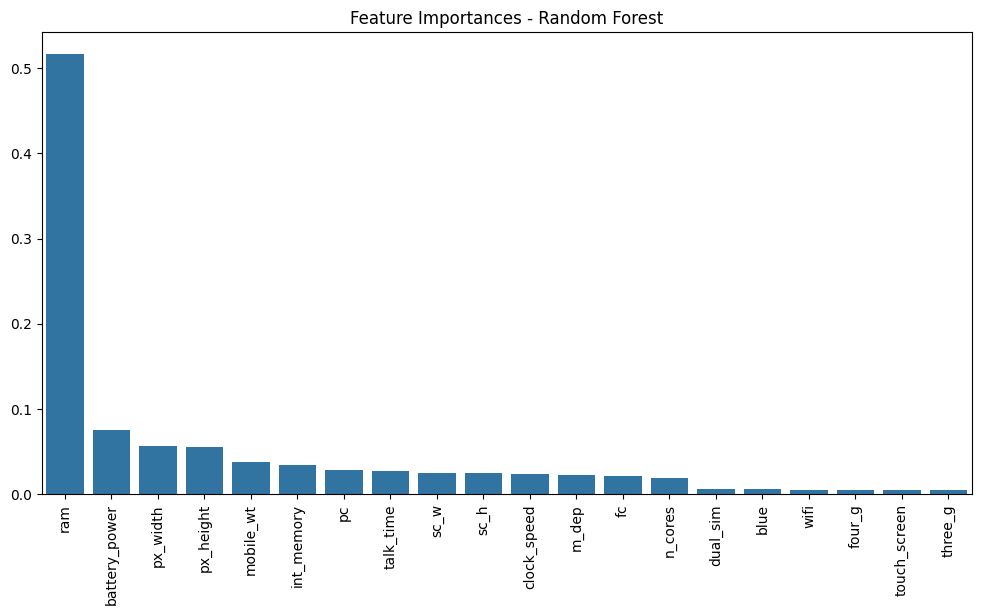

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importancia de características para Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Gráfico de barras de importancia de características
plt.figure(figsize=(12, 6))
sns.barplot(x=[X.columns[i] for i in indices], y=importances[indices])
plt.title("Feature Importances - Random Forest")
plt.xticks(rotation=90)
plt.show()


